In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display


In [4]:
# Create a DataFrame with the dataset
data = {
    "Income_NPR": [6490142.459, 4585207.096, 6943065.614, 9569089.569, 4297539.876, 4297589.129, 9737638.447, 7302304.187, 3591576.842,
                   6627680.131, 3609746.922, 3602810.739, 5725886.815, 100000, 100000, 3313137.412, 1961506.639, 5942741.998, 2275927.773, 763088.896],
    "Employment": [0, 0, 2, 2, 3, 0, 0, 2, 0, 3, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2],
    "Education": [2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 4],
    "Housing": [5, 10, 4, 3, 9, 5, 5, 4, 7, 6, 6, 5, 8, 4, 6, 5, 7, 6, 6, 5],
    "Isolation": [1, 2, 8, 3, 10, 3, 8, 8, 2, 8, 1, 6, 8, 8, 1, 9, 9, 5, 5, 10],
    "Healthcare": [9, 9, 5, 4, 5, 8, 8, 10, 4, 7, 4, 6, 8, 3, 7, 6, 10, 3, 10, 6],
    "Community": [7, 9, 9, 9, 10, 3, 4, 7, 4, 10, 6, 6, 6, 9, 8, 3, 6, 10, 10, 7],
    "Physical_Activity": [5, 5, 4, 3, 2, 2, 0, 5, 0, 4, 4, 1, 7, 1, 3, 0, 6, 3, 3, 4],
    "Risk": [0, 0, 0, 0, 2.003815854, 0.044646772, 0, 0, 1.847340219, 0, 0, 3.390773284, 0, 9.709539088, 10, 0.378969256, 10, 0, 5.093339895, 10]
}

df = pd.DataFrame(data)


In [5]:
# Define the features and target variable
features = ["Income_NPR", "Employment", "Education", "Housing", "Isolation", "Healthcare", "Community", "Physical_Activity"]
X = df[features]
y = df["Risk"]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)


LinearRegression()

In [48]:
# Define the model for Simple Linear Regression
X_income = df["Income_NPR"].values.reshape(-1, 1)  # Features (Income)
y = df["Risk"]  # Target (Risk)

# Train the model
simple_model = LinearRegression()
simple_model.fit(X_income, y)

# Get the formula of the simple regression model
beta_0 = simple_model.intercept_  # Intercept
beta_1 = simple_model.coef_[0]  # Coefficient for 'Income_NPR'
simple_regression_formula = f"Risk = {beta_0:.4f} + ({beta_1:.4f}) * Income_NPR"
print("Simple Regression Formula:", simple_regression_formula)


Simple Regression Formula: Risk = 7.8327 + (-0.0000) * Income_NPR


In [44]:
# Generate the regression equation (Multiple)
equation_parts = [f"{coef:.4f} * {name}" for coef, name in zip(model.coef_, features)]
equation_lines = [" + ".join(equation_parts[i:i+3]) for i in range(0, len(equation_parts), 3)]
equation_string = "Risk Score = " + " + ".join(equation_lines)
print("Risk Regression Equation:")
print(equation_string)


Risk Regression Equation:
Risk Score = -3.3049 * Income_NPR + 0.4113 * Employment + 0.3007 * Education + -0.9261 * Housing + 0.4235 * Isolation + 0.6271 * Healthcare + 0.6194 * Community + -0.1642 * Physical_Activity


In [50]:
# Predictions for Simple Linear Regression (using only 'Income_NPR')
df['Predicted_Risk_Simple'] = simple_model.predict(X_income)

# Predictions for Multiple Linear Regression (using all features)
df['Predicted_Risk_Multiple'] = multiple_model.predict(X_scaled)


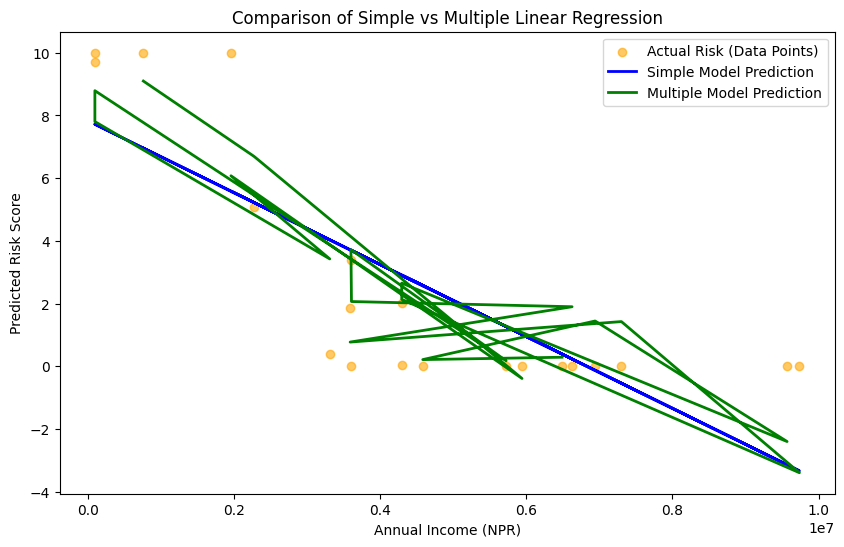

In [51]:
# Plot the actual vs predicted for both models
def plot_comparison():
    fig, ax = plt.subplots(figsize=(10, 6))

    # Actual risk vs predicted risk from Simple Model
    ax.scatter(df["Income_NPR"], df["Risk"], alpha=0.6, color='orange', label="Actual Risk (Data Points)")

    # Predicted risk from Simple Model
    ax.plot(df["Income_NPR"], df['Predicted_Risk_Simple'], color="blue", linewidth=2, label="Simple Model Prediction")

    # Predicted risk from Multiple Model
    ax.plot(df["Income_NPR"], df['Predicted_Risk_Multiple'], color="green", linewidth=2, label="Multiple Model Prediction")

    ax.set_xlabel("Annual Income (NPR)")
    ax.set_ylabel("Predicted Risk Score")
    ax.set_title("Comparison of Simple vs Multiple Linear Regression")
    ax.legend()
    plt.show()

# Call the plot function
plot_comparison()


In [52]:
def income_vs_risk_table():
    # Create a comparison table with Income and predicted risks from both models
    comparison_table = df[['Income_NPR', 'Predicted_Risk_Simple', 'Predicted_Risk_Multiple']]
    print(comparison_table)

# Call the function to display the table
income_vs_risk_table()


     Income_NPR  Predicted_Risk_Simple  Predicted_Risk_Multiple
0   6490142.459               0.388780                 0.287206
1   4585207.096               2.573674                 0.211621
2   6943065.614              -0.130707                 1.443176
3   9569089.569              -3.142663                -2.401938
4   4297539.876               2.903618                 2.651822
5   4297589.129               2.903561                 2.130702
6   9737638.447              -3.335983                -3.396442
7   7302304.187              -0.542741                 1.424374
8   3591576.842               3.713333                 0.770723
9   6627680.131               0.231029                 1.897851
10  3609746.922               3.692492                 2.064092
11  3602810.739               3.700448                 3.720129
12  5725886.815               1.265354                 0.173053
13   100000.000               7.718048                 8.789252
14   100000.000               7.718048  

In [60]:
# Function to predict the risk score
def predict_risk(income_npr, employment, education, housing, isolation, healthcare, community, activity):
    # Map categorical data to numerical values
    employment_dict = {"Employed": 0, "Unemployed": 1, "Student": 2, "Retired": 3}
    education_dict = {"No formal education": 0, "High School": 1, "Bachelor's": 2, "Master's": 3, "Doctorate": 4}

    # Create the input array for the model
    input_array = np.array([[income_npr,
                             employment_dict[employment],
                             education_dict[education],
                             housing,
                             isolation,
                             healthcare,
                             community,
                             activity]])
    input_scaled = scaler.transform(input_array)

    # Get the predicted risk
    prediction = model.predict(input_scaled)[0]
    prediction = float(np.clip(prediction, 0, 10))  # Clip the prediction to the range [0, 10]

    # Display the predicted risk score
    print(f"Predicted Mental Health Risk Score: {prediction:.2f}")

    # Interpretation
    if prediction > 7:
        print("High Risk: You may need professional support and stronger social engagement.")
    elif prediction > 4:
        print("Moderate Risk: Consider improving lifestyle and community interactions.")
    else:
        print("Low Risk: Maintain your current healthy practices.")

    # Display the regression equation
    print("\nRisk Regression Equation:")
    print(equation_string)

In [62]:
# Create widgets for each feature
income_npr_widget = widgets.IntSlider(min=100000, max=10000000, step=100000, value=1200000, description='Income (NPR)')
employment_widget = widgets.Dropdown(options=["Employed", "Unemployed", "Student", "Retired"], description='Employment')
education_widget = widgets.Dropdown(options=["No formal education", "High School", "Bachelor's", "Master's", "Doctorate"], description='Education')
housing_widget = widgets.IntSlider(min=1, max=10, value=6, description='Housing Quality')
isolation_widget = widgets.IntSlider(min=1, max=10, value=4, description='Isolation')
healthcare_widget = widgets.IntSlider(min=1, max=10, value=6, description='Healthcare')
community_widget = widgets.IntSlider(min=1, max=10, value=6, description='Community')
activity_widget = widgets.IntSlider(min=0, max=7, value=3, description='Physical Activity')

# Use widgets.Interactive to trigger prediction when any value changes
interactive_plot = widgets.interactive(predict_risk,
                                       income_npr=income_npr_widget,
                                       employment=employment_widget,
                                       education=education_widget,
                                       housing=housing_widget,
                                       isolation=isolation_widget,
                                       healthcare=healthcare_widget,
                                       community=community_widget,
                                       activity=activity_widget)

# Display the widgets
display(interactive_plot)


interactive(children=(IntSlider(value=1200000, description='Income (NPR)', max=10000000, min=100000, step=1000…

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


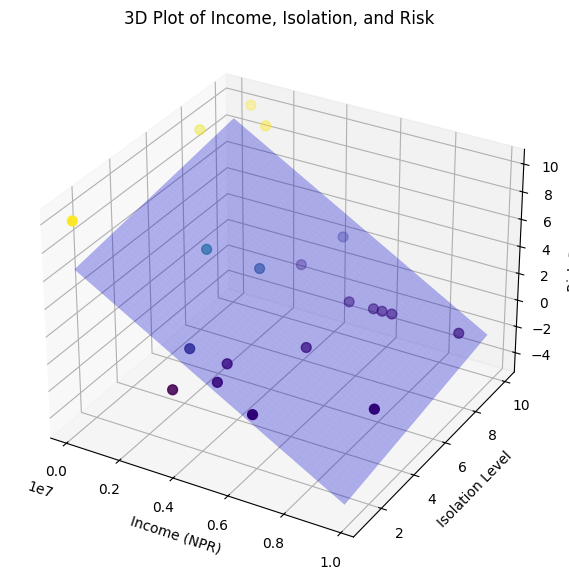

In [17]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D


# Extract the relevant columns for the 3D plot
income_npr = df["Income_NPR"]
isolation = df["Isolation"]
risk = df["Risk"]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(income_npr, isolation, risk, c=risk, cmap='viridis', s=50)

# Set labels for each axis
ax.set_xlabel('Income (NPR)')
ax.set_ylabel('Isolation Level')
ax.set_zlabel('Risk Score')

# Set title for the plot
ax.set_title('3D Plot of Income, Isolation, and Risk')

# Fit a linear regression model
X = df[["Income_NPR", "Isolation"]]  # Predictor variables
y = df["Risk"]  # Target variable

# Initialize and fit the model
regressor = LinearRegression()
regressor.fit(X, y)

# Create a meshgrid for the surface plot
income_range = np.linspace(X["Income_NPR"].min(), X["Income_NPR"].max(), 100)
isolation_range = np.linspace(X["Isolation"].min(), X["Isolation"].max(), 100)
income_grid, isolation_grid = np.meshgrid(income_range, isolation_range)

# Predict the risk for each point on the meshgrid
risk_grid = regressor.predict(np.c_[income_grid.ravel(), isolation_grid.ravel()])
risk_grid = risk_grid.reshape(income_grid.shape)

# Plot the regression surface
ax.plot_surface(income_grid, isolation_grid, risk_grid, color='b', alpha=0.3)

# Show the plot
plt.show()